Constant Oracle Circuit:


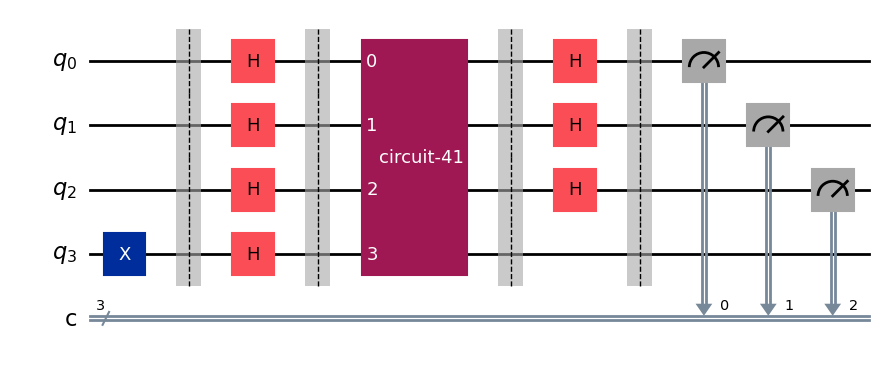

Balanced Oracle Circuit:


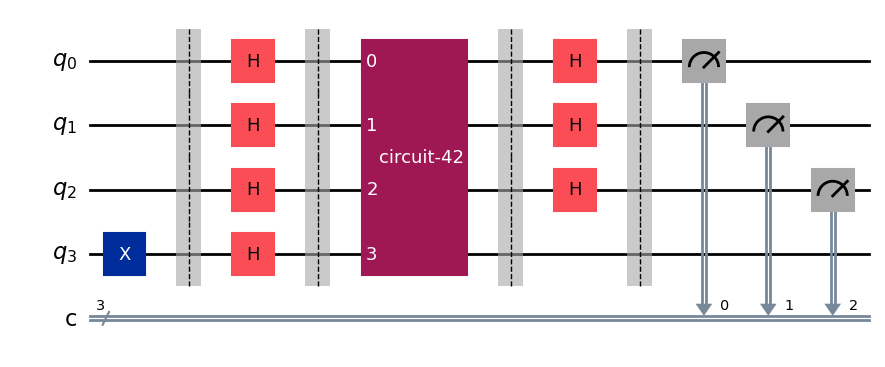


--- Statevector Simulation ---
Constant function statevector:
Statevector([ 7.07106781e-01+0.j,  6.73463194e-18+0.j,  1.66988925e-17+0.j,
              8.93190087e-35+0.j, -9.52420783e-18+0.j,  1.22527931e-34+0.j,
              6.49514367e-34+0.j, -2.07756904e-51+0.j, -7.07106781e-01+0.j,
             -6.73463194e-18+0.j, -1.66988925e-17+0.j, -8.93190087e-35+0.j,
              9.52420783e-18+0.j, -1.22527931e-34+0.j, -6.49514367e-34+0.j,
              2.07756904e-51+0.j],
            dims=(2, 2, 2, 2))
Constant function probabilities:
{np.str_('0000'): np.float64(0.49999999999999944), np.str_('0001'): np.float64(4.5355267350666813e-35), np.str_('0010'): np.float64(2.788530103721798e-34), np.str_('0011'): np.float64(7.977885313775085e-69), np.str_('0100'): np.float64(9.071053470133419e-35), np.str_('0101'): np.float64(1.5013093925448434e-68), np.str_('0110'): np.float64(4.21868912620202e-67), np.str_('0111'): np.float64(4.3162931180233966e-102), np.str_('1000'): np.float64(0.4999999999

In [1]:
# 06-deutsch-jozsa.ipynb
# Quantum-Algorithms Repo
# Qiskit 2.x compatible, uses Statevector

# --- Imports ---
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt

# --- Step 1: Define Oracles ---

def constant_oracle(n_qubits):
    """Returns a constant oracle (f(x) = 0)"""
    qc = QuantumCircuit(n_qubits + 1)
    # Do nothing: f(x) = 0
    return qc

def balanced_oracle(n_qubits):
    """Returns a balanced oracle by flipping output qubit conditioned on input qubit 0"""
    qc = QuantumCircuit(n_qubits + 1)
    qc.cx(0, n_qubits)  # simple example for 3 qubits
    return qc

# --- Step 2: Deutsch-Jozsa Circuit ---

def deutsch_jozsa_circuit(n_qubits, oracle):
    qc = QuantumCircuit(n_qubits + 1, n_qubits)
    # Step 2a: Initialize last qubit to |1>
    qc.x(n_qubits)
    qc.barrier()
    # Step 2b: Apply Hadamard to all qubits
    for q in range(n_qubits + 1):
        qc.h(q)
    qc.barrier()
    # Step 2c: Apply the oracle
    qc.append(oracle, range(n_qubits + 1))
    qc.barrier()
    # Step 2d: Apply Hadamard again to input qubits
    for q in range(n_qubits):
        qc.h(q)
    qc.barrier()
    # Step 2e: Measure input qubits
    qc.measure(range(n_qubits), range(n_qubits))
    return qc

# --- Step 3: Build and visualize circuits ---

n = 3  # number of input qubits

oracle_const = constant_oracle(n)
oracle_bal = balanced_oracle(n)

qc_const = deutsch_jozsa_circuit(n, oracle_const)
qc_bal = deutsch_jozsa_circuit(n, oracle_bal)

# Draw circuits
print("Constant Oracle Circuit:")
display(qc_const.draw('mpl'))
plt.show()

print("Balanced Oracle Circuit:")
display(qc_bal.draw('mpl'))
plt.show()

# --- Step 4: Statevector simulation (without measurement) ---

# Circuit without measurements
def remove_measurements(qc):
    qc_no_meas = qc.remove_final_measurements(inplace=False)
    return qc_no_meas

print("\n--- Statevector Simulation ---")

for name, qc in [("Constant", qc_const), ("Balanced", qc_bal)]:
    sv = Statevector.from_instruction(remove_measurements(qc))
    print(f"{name} function statevector:\n{sv}")
    
    # Bloch sphere visualization for single qubits
    if n == 1:
        plot_bloch_multivector(sv)
        plt.show()
    
    # Probabilities
    probs = sv.probabilities_dict()
    print(f"{name} function probabilities:\n{probs}")
    plot_histogram(probs)
    plt.show()

# --- Step 5: Summary ---
print("""
✅ Interpretation:
- If all input qubits measured as 0 → Constant function
- Else → Balanced function
Quantum advantage: only 1 query needed, classical requires 2^(n-1) + 1 queries
""")
